In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
activity_cols = ['IN_VEHICLE', 'ON_BIKE', 'ON_FOOT', 'RUNNING', 'STILL', 'WALKING']
mood_cols = ['Q1_SAD', 'Q2_HAPP', 'Q3_FATIG', 'Q4_EN', 'Q5_REL']

In [3]:
feature_sets = {
    'activity_based': [
        'IN_VEHICLE_prop', 'ON_BIKE_prop', 'ON_FOOT_prop',
        'RUNNING_prop', 'STILL_prop', 'WALKING_prop',
        'IN_VEHICLE_rate', 'ON_BIKE_rate', 'ON_FOOT_rate',
        'RUNNING_rate', 'STILL_rate', 'WALKING_rate'
    ],
    
    'phone_usage': [
        'daily_screen_hours', 'avg_session_duration',
        'usage_per_day_hours', 'UNLOCK_EVENTS_NUM'
    ],
    
    'physical_activity': [
        'activity_intensity', 'activity_intensity_ma7',
        'activity_intensity_std7'
    ],
    
    'sleep': [
        'sleep_hours', 'sleep_hours_ma7'
    ],
    
    'temporal': [
        'dayofweek', 'is_weekend', 'month'
    ]
}

Processing afflictedrevenueepilepsy_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING        STILL  WALKING
count  370.000000  370.000000  370.000000    370.0   370.000000    370.0
mean    49.389189    1.370270   25.635135      0.0   680.124324      0.0
std     33.800946    3.549218   19.627544      0.0   444.074948      0.0
min      0.000000    0.000000    0.000000      0.0    33.000000      0.0
25%     21.000000    0.000000    9.000000      0.0   197.250000      0.0
50%     52.500000    0.000000   22.000000      0.0   630.000000      0.0
75%     74.000000    1.000000   37.000000      0.0  1128.500000      0.0
max    169.000000   25.000000   92.000000      0.0  1415.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  360.000000  360.000000  360.000000  360.000000  360.000000
mean     1.463321    1.653654    2.248440    1.668935    2.048798
std      0.827290    0.942208    0.853813   

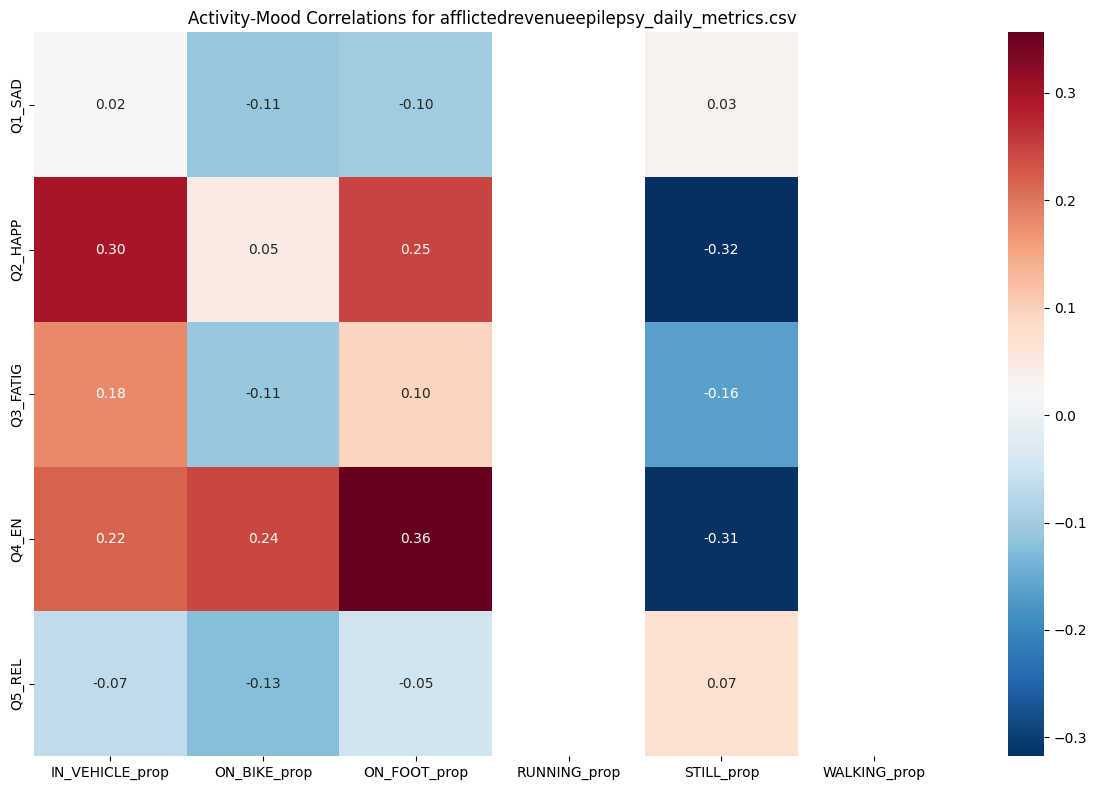

Processing anagramprobingscrooge_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING       STILL  WALKING
count  371.000000  371.000000  371.000000    371.0  371.000000    371.0
mean     8.528302    0.452830   43.250674      0.0  184.107817      0.0
std     14.798507    1.124571   34.777660      0.0   67.446469      0.0
min      0.000000    0.000000    0.000000      0.0   11.000000      0.0
25%      0.000000    0.000000   10.000000      0.0  143.000000      0.0
50%      1.000000    0.000000   42.000000      0.0  176.000000      0.0
75%     11.000000    1.000000   62.000000      0.0  214.500000      0.0
max     88.000000   10.000000  167.000000      0.0  492.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  365.000000  365.000000  365.000000  365.000000  365.000000
mean     2.572031    3.113219    2.686852    3.063329    3.640014
std      0.751725    0.713809    0.808844    0.771687   

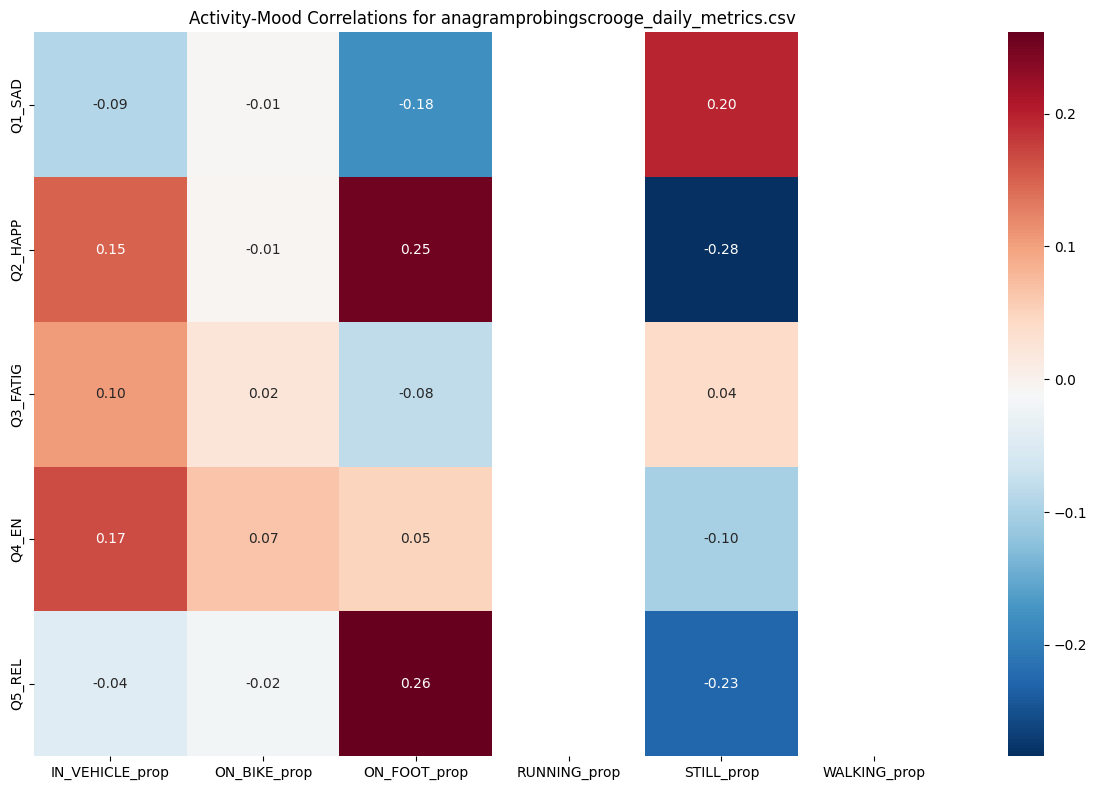

Processing diagramuncoupleoutput_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING        STILL  WALKING
count  328.000000  328.000000  328.000000    328.0   328.000000    328.0
mean    23.893293    0.307927   34.713415      0.0   470.646341      0.0
std     43.736187    0.707970   27.704042      0.0   350.909325      0.0
min      0.000000    0.000000    0.000000      0.0     1.000000      0.0
25%      0.000000    0.000000   13.750000      0.0   247.000000      0.0
50%      4.500000    0.000000   25.000000      0.0   301.500000      0.0
75%     34.000000    0.000000   48.000000      0.0   554.000000      0.0
max    365.000000    5.000000  175.000000      0.0  1325.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  320.000000  320.000000  320.000000  320.000000  320.000000
mean     2.241080    2.616465    2.481222    1.883339    3.269159
std      0.902399    0.772737    0.871683    0.

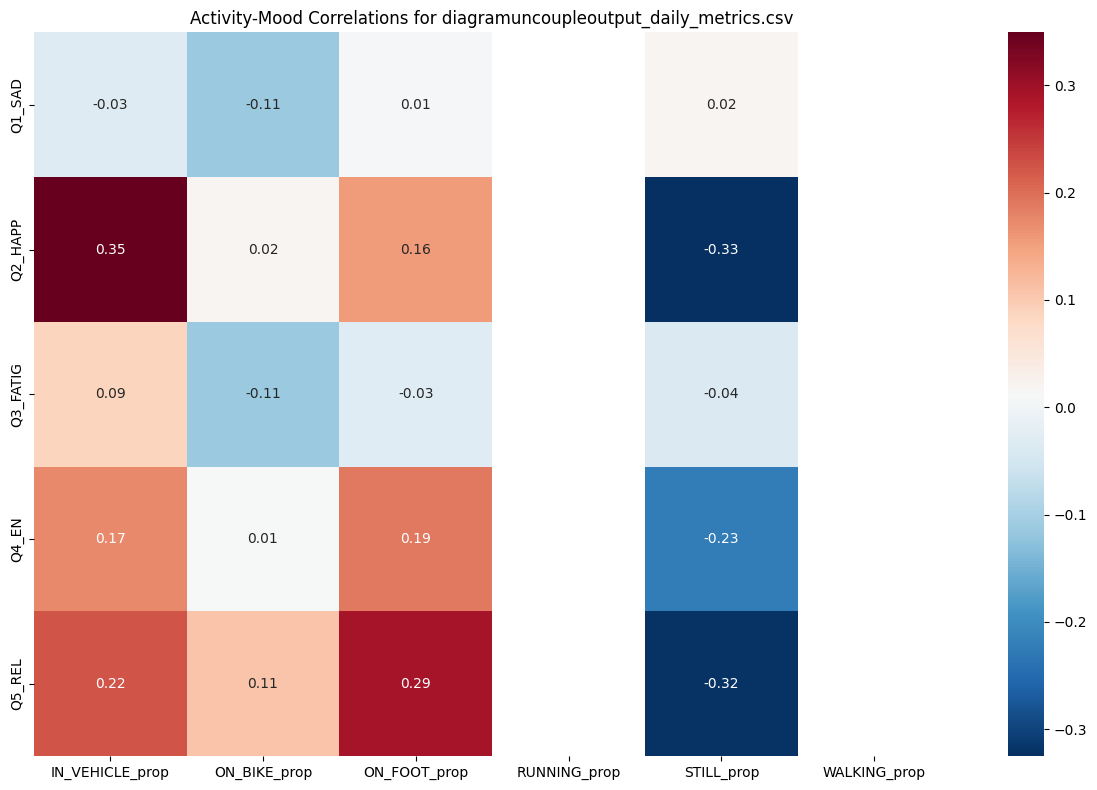

Processing dissuadecelestialrelic_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE    ON_BIKE     ON_FOOT  RUNNING        STILL  WALKING
count   38.000000  38.000000   38.000000     38.0    38.000000     38.0
mean    82.947368   0.210526   17.289474      0.0   317.236842      0.0
std     94.674962   0.622023   20.064636      0.0   304.782105      0.0
min      0.000000   0.000000    0.000000      0.0    17.000000      0.0
25%     26.500000   0.000000    5.000000      0.0    70.750000      0.0
50%     56.500000   0.000000   10.500000      0.0   191.500000      0.0
75%     76.500000   0.000000   26.000000      0.0   525.750000      0.0
max    332.000000   3.000000  103.000000      0.0  1134.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  314.000000  314.000000  314.000000  314.000000  314.000000
mean     1.595750    3.564182    1.918198    3.324172    3.146770
std      0.642332    0.729685    0.579252    0.570057  

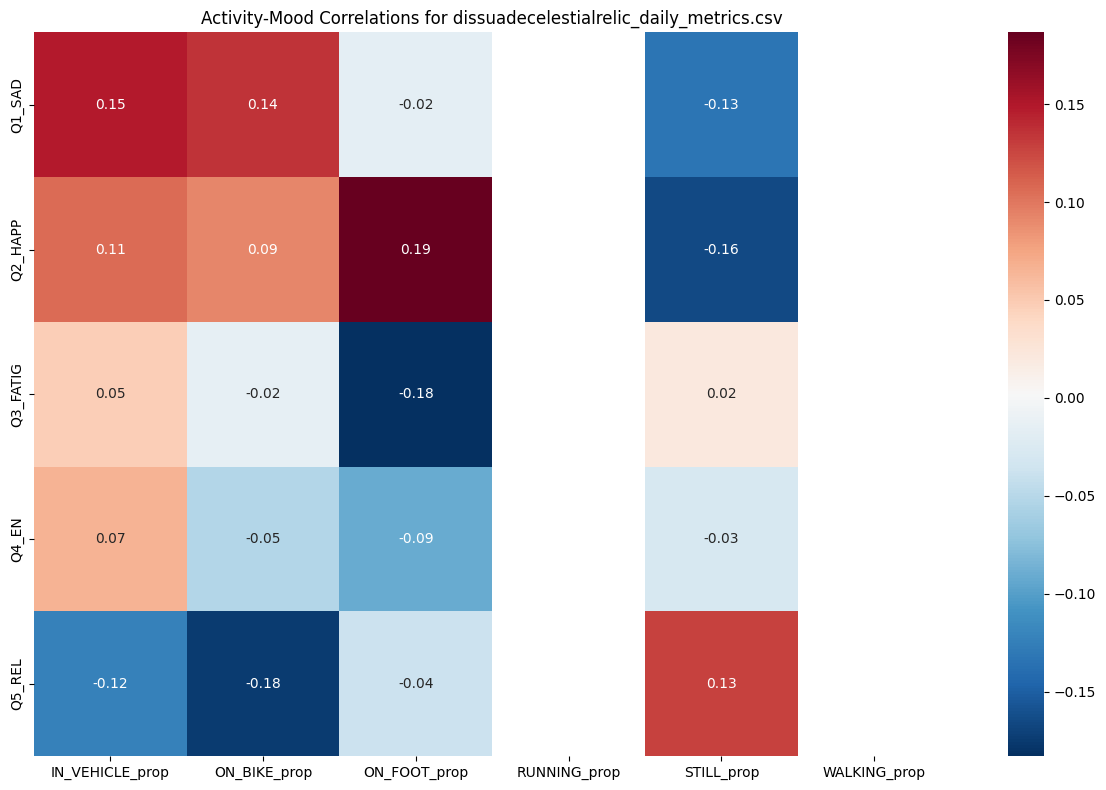

Processing groinunratedbattery_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING       STILL  WALKING
count  361.000000  361.000000  361.000000    361.0  361.000000    361.0
mean     1.293629    0.024931    1.448753      0.0   76.357341      0.0
std      4.036939    0.173009    4.387894      0.0   78.561952      0.0
min      0.000000    0.000000    0.000000      0.0    2.000000      0.0
25%      0.000000    0.000000    0.000000      0.0   39.000000      0.0
50%      0.000000    0.000000    0.000000      0.0   51.000000      0.0
75%      0.000000    0.000000    1.000000      0.0   78.000000      0.0
max     33.000000    2.000000   43.000000      0.0  490.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  352.000000  352.000000  352.000000  352.000000  352.000000
mean     1.003598    4.951176    1.076330    4.923667    4.946156
std      0.054255    0.211529    0.266505    0.278893    0

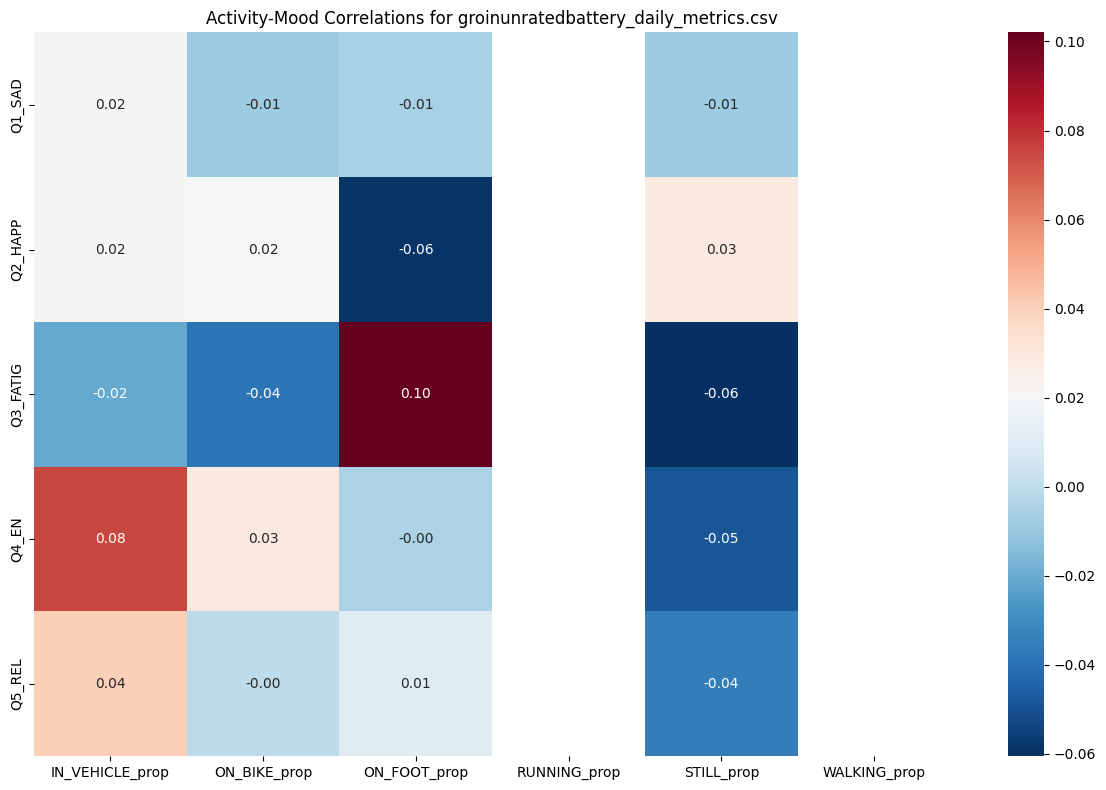

Processing smeltingexerciserstabilize_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING       STILL  WALKING
count  222.000000  222.000000  222.000000    222.0  222.000000    222.0
mean     3.644144    0.040541   11.166667      0.0   39.328829      0.0
std     11.326677    0.197669   20.977992      0.0   55.623532      0.0
min      0.000000    0.000000    0.000000      0.0    0.000000      0.0
25%      0.000000    0.000000    0.000000      0.0    8.000000      0.0
50%      1.000000    0.000000    2.500000      0.0   21.500000      0.0
75%      4.000000    0.000000   10.750000      0.0   47.000000      0.0
max    155.000000    1.000000  102.000000      0.0  289.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  212.000000  212.000000  212.000000  212.000000  212.000000
mean     2.914585    2.711216    3.356511    2.012866    2.296943
std      0.747386    0.808247    0.742590    0.6450

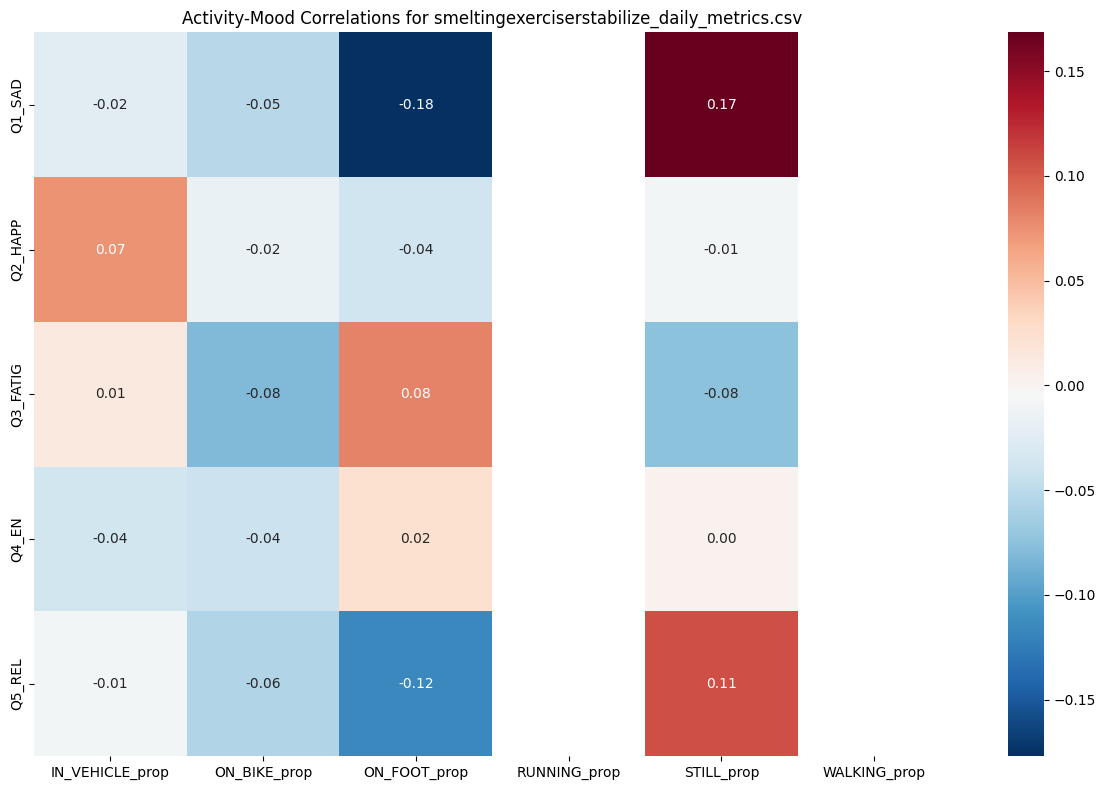

Processing spinstersubatomiccoyness_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING        STILL  WALKING
count  186.000000  186.000000  186.000000    186.0   186.000000    186.0
mean    18.967742    0.419355   10.967742      0.0   465.295699      0.0
std     64.223588    1.118131   15.021751      0.0   340.734142      0.0
min      0.000000    0.000000    0.000000      0.0   114.000000      0.0
25%      0.250000    0.000000    2.000000      0.0   278.000000      0.0
50%      4.500000    0.000000    5.500000      0.0   298.000000      0.0
75%     11.750000    0.000000   13.750000      0.0   393.000000      0.0
max    589.000000    9.000000   84.000000      0.0  1317.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  355.000000  355.000000  355.000000  355.000000  355.000000
mean     1.134135    4.216929    1.494836    3.937485    4.514799
std      0.402222    0.583398    0.637902   

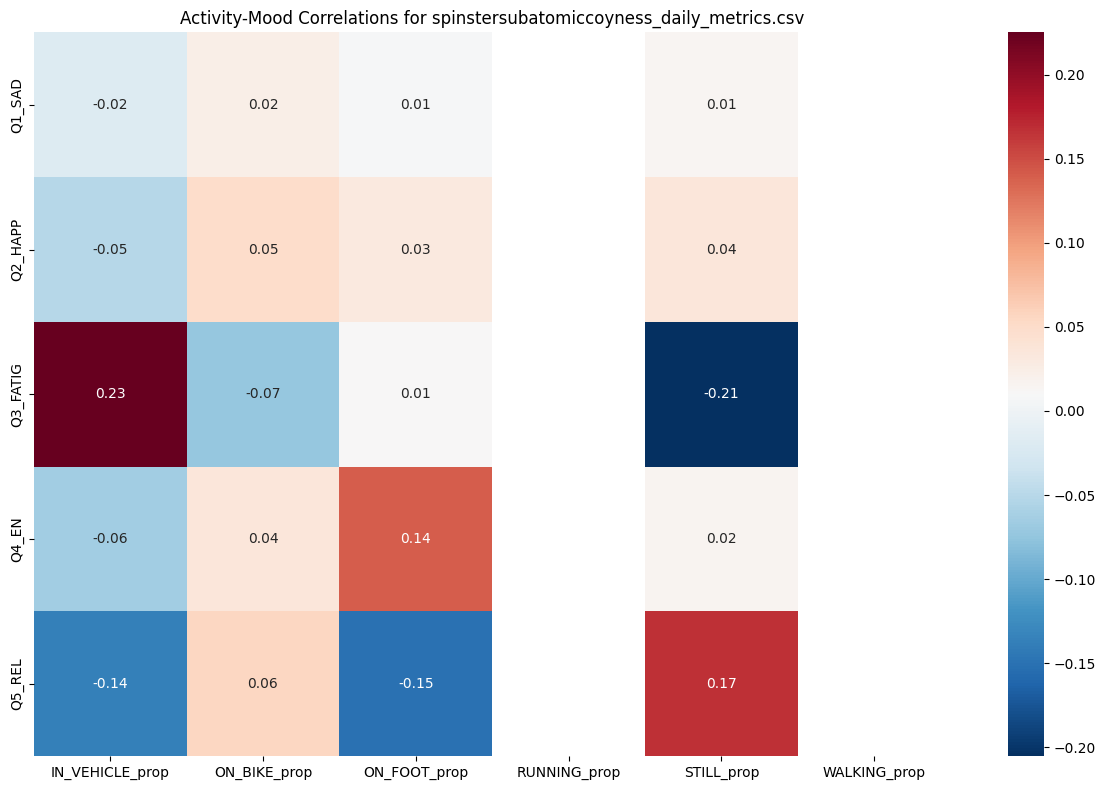

Processing subtitlegrievousbazooka_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING       STILL  WALKING
count  300.000000  300.000000  300.000000    300.0  300.000000    300.0
mean     0.566667    0.073333    0.330000      0.0   84.153333      0.0
std      1.655705    0.441897    0.789416      0.0  142.508803      0.0
min      0.000000    0.000000    0.000000      0.0    0.000000      0.0
25%      0.000000    0.000000    0.000000      0.0   29.000000      0.0
50%      0.000000    0.000000    0.000000      0.0   39.000000      0.0
75%      1.000000    0.000000    0.000000      0.0   52.000000      0.0
max     22.000000    6.000000    5.000000      0.0  816.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  335.000000  335.000000  335.000000  335.000000  335.000000
mean     1.037778    3.088656    2.955325    2.553115    2.983900
std      0.221687    0.362453    0.467219    0.567719 

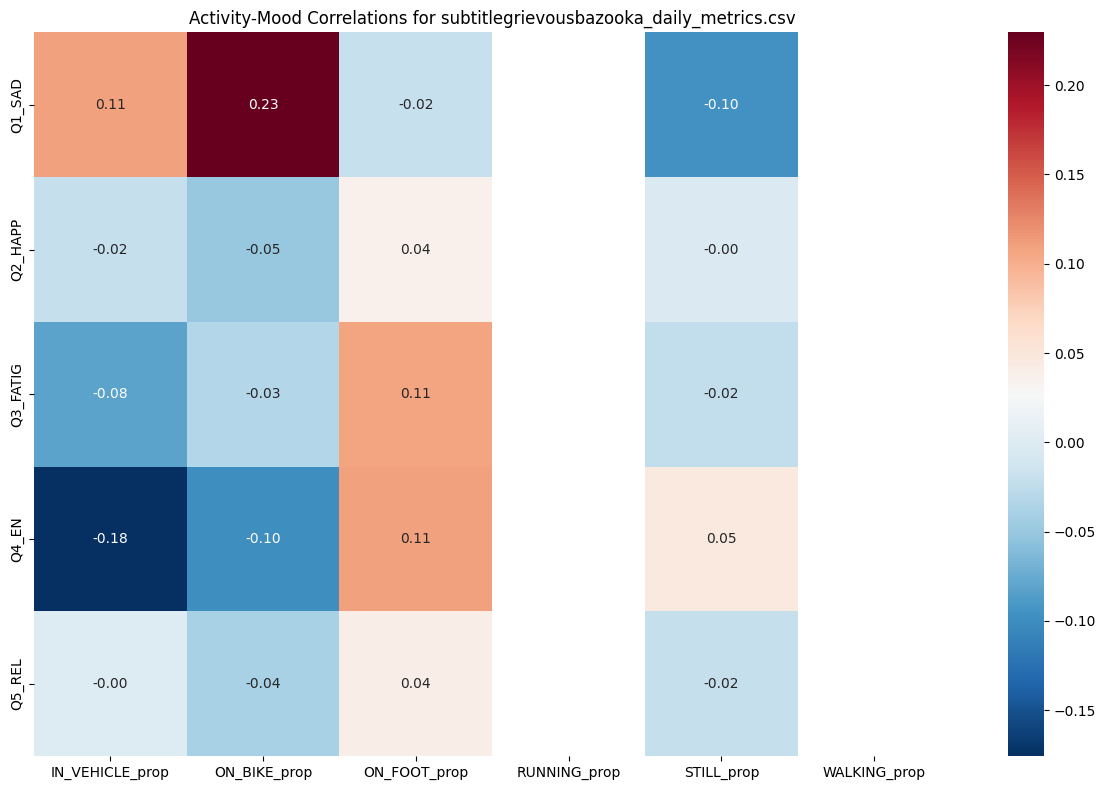

Processing tipoffstarchpartly_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING        STILL  WALKING
count  358.000000  358.000000  358.000000    358.0   358.000000    358.0
mean    30.977654    0.092179   46.930168      0.0   428.829609      0.0
std     45.843597    0.534413   32.722467      0.0   344.705763      0.0
min      0.000000    0.000000    0.000000      0.0    44.000000      0.0
25%      0.000000    0.000000   26.000000      0.0   192.000000      0.0
50%     26.000000    0.000000   41.500000      0.0   255.000000      0.0
75%     37.000000    0.000000   58.000000      0.0   661.000000      0.0
max    412.000000    7.000000  259.000000      0.0  1252.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  337.000000  337.000000  337.000000  337.000000  337.000000
mean     1.476749    2.661766    2.236670    2.523723    3.463584
std      0.693739    0.650755    0.676575    0.665

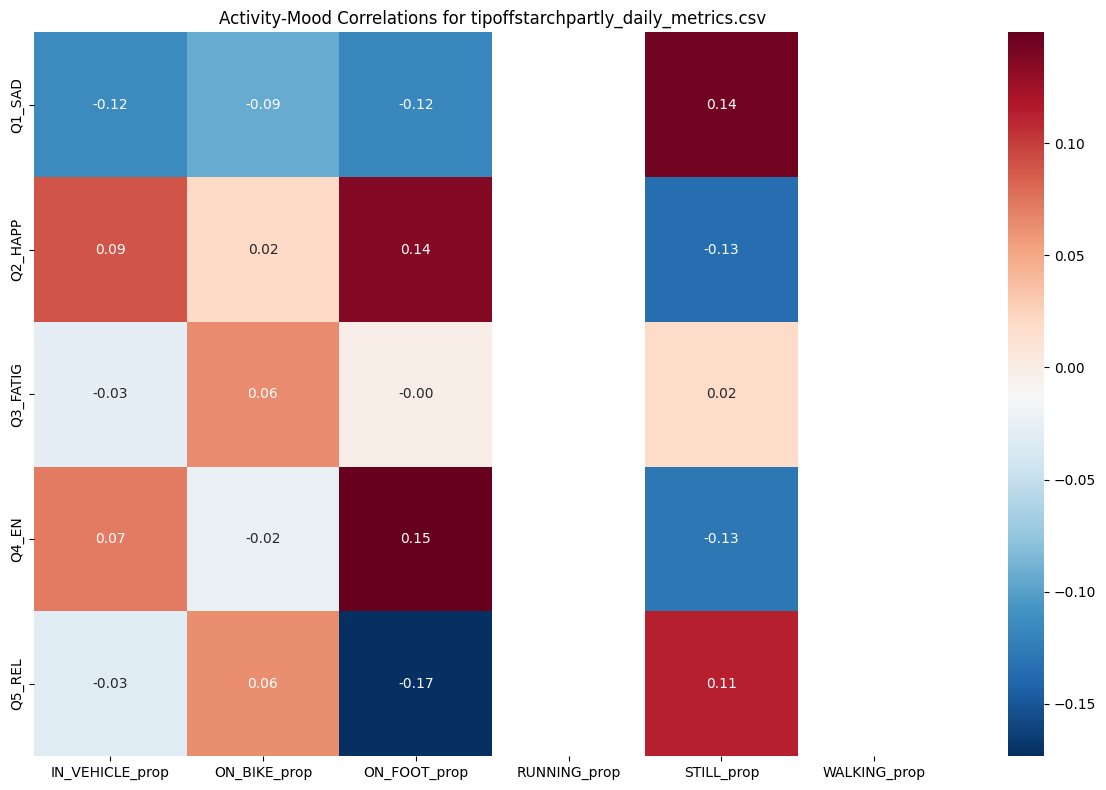

Processing washboardceramicsenticing_daily_metrics.csv...

Activity Counts Summary:
       IN_VEHICLE     ON_BIKE     ON_FOOT  RUNNING        STILL  WALKING
count  381.000000  381.000000  381.000000    381.0   381.000000    381.0
mean    15.892388    0.175853    3.359580      0.0   612.280840      0.0
std     32.935607    0.578605    5.606326      0.0   489.614308      0.0
min      0.000000    0.000000    0.000000      0.0    60.000000      0.0
25%      0.000000    0.000000    0.000000      0.0   171.000000      0.0
50%      2.000000    0.000000    1.000000      0.0   455.000000      0.0
75%     18.000000    0.000000    4.000000      0.0  1182.000000      0.0
max    226.000000    7.000000   31.000000      0.0  1375.000000      0.0

Mood Statistics:
           Q1_SAD     Q2_HAPP    Q3_FATIG       Q4_EN      Q5_REL
count  362.000000  362.000000  362.000000  362.000000  362.000000
mean     1.895611    3.196141    4.184155    3.088173    3.032491
std      1.120452    0.807529    0.746270  

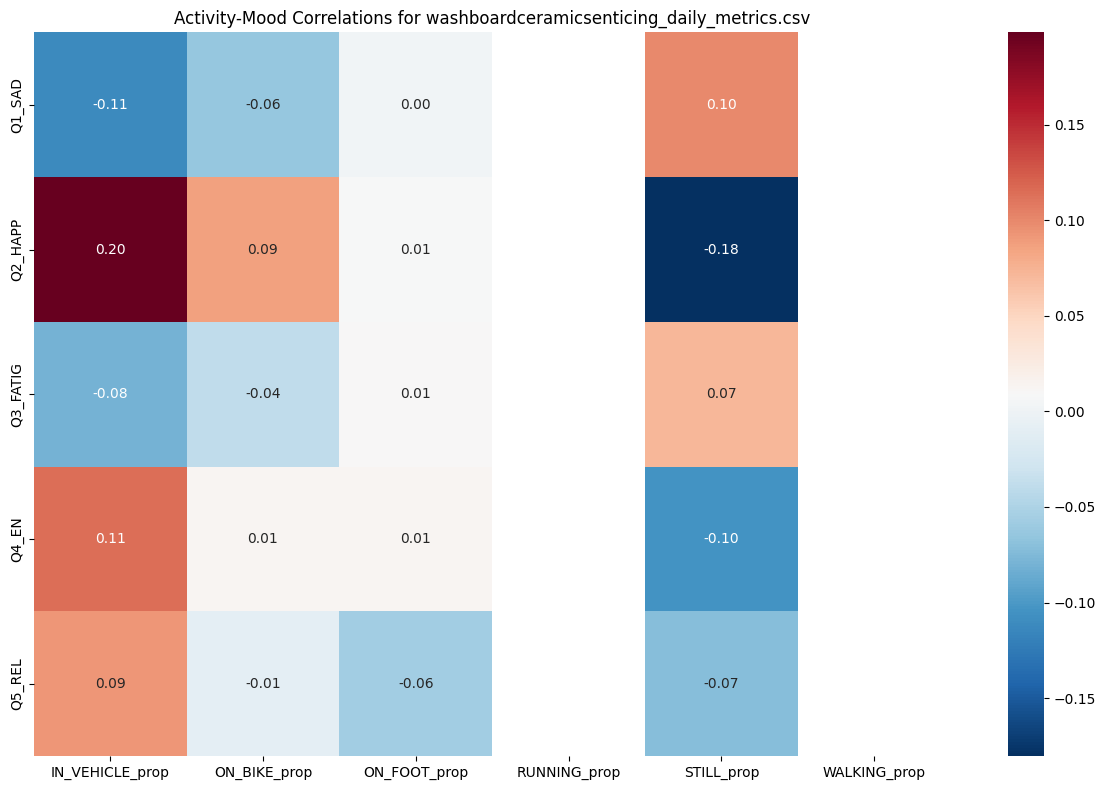

In [4]:
subject_ids = sorted(os.listdir('data'))

results = {}

for subject_id in subject_ids:
    print(f'Processing {subject_id}...')

    # Load data
    df = pd.read_csv(f'data/{subject_id}')

    df['date'] = pd.to_datetime(df['date'])

    df['total_activities'] = df[activity_cols].sum(axis=1)

    for col in activity_cols:
        df[f'{col}_prop'] = df[col] / df['total_activities']
        
    if 'SCREEN_ON_SECONDS' in df.columns:
        df['daily_screen_hours'] = df['SCREEN_ON_SECONDS'] / 3600

    if 'UNLOCK_EVENTS_NUM' in df.columns and 'USAGE_DURATION_MIN' in df.columns:
        df['avg_session_duration'] = df['USAGE_DURATION_MIN'] / df['UNLOCK_EVENTS_NUM']
        df['usage_per_day_hours'] = df['USAGE_DURATION_MIN'] / 60

    df['dayofweek'] = df['date'].dt.weekday
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['month'] = df['date'].dt.month

    if 'MIMS_SUM_WEAR' in df.columns:
        # Create rolling statistics for physical activity
        df['activity_intensity'] = df['MIMS_SUM_WEAR']
        df['activity_intensity_ma7'] = df['MIMS_SUM_WEAR'].rolling(window=7).mean()
        df['activity_intensity_std7'] = df['MIMS_SUM_WEAR'].rolling(window=7).std()
    
    # Sleep features
    if 'SLEEP_MINUTES' in df.columns:
        df['sleep_hours'] = df['SLEEP_MINUTES'] / 60
        df['sleep_hours_ma7'] = df['sleep_hours'].rolling(window=7).mean()
    
    # Create lag features for mood variables
    mood_cols = ['Q1_SAD', 'Q2_HAPP', 'Q3_FATIG', 'Q4_EN', 'Q5_REL']
    for col in mood_cols:
        if col in df.columns:
            # Previous day
            df[f'{col}_lag1'] = df[col].shift(1)
            # Two days ago
            df[f'{col}_lag2'] = df[col].shift(2)
            # Weekly moving average
            df[f'{col}_ma7'] = df[col].rolling(window=7).mean()
            # Weekly standard deviation
            df[f'{col}_std7'] = df[col].rolling(window=7).std()


    print("\nActivity Counts Summary:")
    print(df[activity_cols].describe())
    
    # Mood patterns
    mood_cols = ['Q1_SAD', 'Q2_HAPP', 'Q3_FATIG', 'Q4_EN', 'Q5_REL']
    print("\nMood Statistics:")
    print(df[mood_cols].describe())
    
    # Correlations between activities and moods
    activity_props = [col for col in df.columns if '_prop' in col]
    correlations = df[mood_cols + activity_props].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlations.loc[mood_cols, activity_props], 
                annot=True, fmt='.2f', cmap='RdBu_r')
    plt.title(f'Activity-Mood Correlations for {subject_id}')
    plt.tight_layout()
    plt.show()